# Telecom Churn Case Study

### Step 1 : Importing  Data

In [1]:
#import essential python libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Display properties
pd.set_option('display.max_columns',None)

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
churn_data = pd.read_csv('telecom_churn_data.csv')

### Step 2 : Inspecting the Dataframe

In [4]:
#checking shape of DataFrame
churn_data.shape

(99999, 226)

#### We have 226 columns and 99,999 rows

In [5]:
#checking data
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
#Data properties
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Step 3 : Filtering high value customers as our business objective is to reduce churn of the high-value customers

In [7]:
#Check for missing values in 'total_rech_amt_6' and 'total_rech_amt_7'
print(churn_data['total_rech_amt_6'].isna().sum())
print(churn_data['total_rech_amt_7'].isna().sum())

0
0


In [8]:
#Average of total recharge amount during 'Good' phase
churn_data['rch_amt_avg'] = round((churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7'])/2,2)  

In [9]:
churn_data['rch_amt_avg'].quantile(0.70)

368.5

In [10]:
#Filtering out High value customers
churn_data = churn_data[churn_data['rch_amt_avg'] >= churn_data['rch_amt_avg'].quantile(0.70)]
churn_data.shape

(30011, 227)

### Step 4 : Tag churners and remove attributes of the churn phase

In [11]:
#Check missing values in 'total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'
churn_data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [12]:
#Defining function to map churn value as 1/0 
def cond(churn_data):
    if (churn_data['total_ic_mou_9'] == 0.00) and (churn_data['total_og_mou_9'] == 0.00) and (churn_data['vol_2g_mb_9'] == 0) and (churn_data['vol_3g_mb_9'] == 0) :
        return 1
    else:
        return 0

In [13]:
#Adding new column 'churn'
churn_data['churn'] = churn_data.apply(cond, axis=1)

In [14]:
#Checking class balance
churn_data['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

#### This indicates presence of highly imbalanced classes ,we have only about 10% data of customers who are churned

In [15]:
#Removing all the attributes corresponding to the churn phase
churn_data = churn_data.loc[:,~churn_data.columns.str.endswith("_9")]

In [16]:
#Dataframe after removing features ending with '_9'
churn_data.shape

(30011, 174)

### Step 5 : Data Quality Checks

In [17]:
#Check percentage of missing values
missing_values = round(churn_data.isna().sum()/churn_data.shape[0],2)*100

In [18]:
# features with missing values > 60%
missing_values_60 = missing_values[missing_values > 60]

missing_values_60

date_of_last_rech_data_6    62.0
date_of_last_rech_data_7    61.0
date_of_last_rech_data_8    61.0
total_rech_data_6           62.0
total_rech_data_7           61.0
total_rech_data_8           61.0
max_rech_data_6             62.0
max_rech_data_7             61.0
max_rech_data_8             61.0
count_rech_2g_6             62.0
count_rech_2g_7             61.0
count_rech_2g_8             61.0
count_rech_3g_6             62.0
count_rech_3g_7             61.0
count_rech_3g_8             61.0
av_rech_amt_data_6          62.0
av_rech_amt_data_7          61.0
av_rech_amt_data_8          61.0
arpu_3g_6                   62.0
arpu_3g_7                   61.0
arpu_3g_8                   61.0
arpu_2g_6                   62.0
arpu_2g_7                   61.0
arpu_2g_8                   61.0
night_pck_user_6            62.0
night_pck_user_7            61.0
night_pck_user_8            61.0
fb_user_6                   62.0
fb_user_7                   61.0
fb_user_8                   61.0
dtype: flo

In [19]:
#Drop features with more than 60% missing values
churn_data.drop(columns = missing_values_60.index,inplace=True,axis=1)

In [20]:
#shape after removing columns having more than 60% missing values
churn_data.shape

(30011, 144)

In [21]:
churn_data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rch_amt_avg,churn
count,3.001100e+04,30011.0,29897.0,29897.0,29897.0,30011,29980,29854,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,29949,29897,29417,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Dealing with Date columns

In [22]:
date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6',
            'last_date_of_month_7','last_date_of_month_8',]

In [23]:
#Mode imputation 
for col in date_cols:
        churn_data[col].fillna(churn_data[col].mode().iloc[0],axis = 0,inplace=True)
    
    
#Check percentage of missing values
na_perc = round(churn_data.isna().sum()/churn_data.shape[0],2)*100
na_perc

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             1.0
onnet_mou_7             1.0
onnet_mou_8             3.0
offnet_mou_6            1.0
offnet_mou_7            1.0
offnet_mou_8            3.0
roam_ic_mou_6           1.0
roam_ic_mou_7           1.0
roam_ic_mou_8           3.0
roam_og_mou_6           1.0
roam_og_mou_7           1.0
roam_og_mou_8           3.0
loc_og_t2t_mou_6        1.0
loc_og_t2t_mou_7        1.0
loc_og_t2t_mou_8        3.0
loc_og_t2m_mou_6        1.0
loc_og_t2m_mou_7        1.0
loc_og_t2m_mou_8        3.0
loc_og_t2f_mou_6        1.0
                       ... 
date_of_last_rech_7     0.0
date_of_last_rech_8     0.0
last_day_rch_amt_6      0.0
last_day_rch_amt_7      0.0
last_day_rch_amt_8  

#### Imputing columns with less than 60% missing values

In [24]:
missing_values = round(churn_data.isnull().sum(axis=0)/churn_data.shape[0]*100,2)
to_impute = missing_values[(missing_values.values < 60) & (missing_values.values>0)].index

In [25]:
churn_data[to_impute].describe(include='all')

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,29897.0,29897.0,29897.0,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000
mean,0.0,0.0,0.0,299.184718,307.447285,276.234168,422.380819,428.248096,387.121245,17.598062,13.660030,13.683965,29.633675,22.260754,22.161948,95.688242,96.706103,89.951446,183.208674,183.120362,172.998297,7.053601,7.169655,6.703844,1.583837,1.881222,1.767998,285.959416,287.005181,269.662288,191.772393,201.916113,177.752086,205.259036,215.588560,185.362328,2.032163,2.054989,1.847471,0.0,0.0,0.0,399.067969,419.564032,364.965911,2.288522,2.229914,2.094787,5.979323,7.501222,7.107334,0.699876,0.048085,0.061039,69.480649,71.028476,68.064333,161.312344,162.453208,158.585128,15.761590,16.678413,15.180997,246.564535,250.170194,241.840347,16.402055,17.066026,15.537177,32.355853,33.818592,31.416700,2.905095,3.023474,2.767422,0.0,0.0,0.0,51.667018,53.912174,49.725160,0.067441,0.018250,0.028552,11.275252,12.486255,12.078346,1.201454,1.491952,1.277691
std,0.0,0.0,0.0,462.202367,483.244786,471.505518,471.096294,487.103204,480.279273,79.552216,76.679599,75.706579,119.160857,98.397962,107.874014,237.903645,249.205463,237.947663,250.755724,241.245958,236.653042,22.774304,22.692338,20.509418,6.923971,9.300807,7.509452,380.873082,376.646673,369.341135,411.420669,429.818676,415.409296,415.149605,439.636272,422.152597,12.521796,13.416765,11.883145,0.0,0.0,0.0,608.350635,639.300752,622.748058,46.161171,45.850893,45.510330,18.710136,23.170819,23.225842,2.292307,2.755729,3.373442,159.329635,168.015550,157.735902,222.564453,219.943309,218.709960,46.041807,49.701815,44.332505,313.446109,316.075062,309.013919,79.2630

In [26]:
#finding cols that have just one unique value
one_unique_value =[]
for col in to_impute:
    if (churn_data[col].nunique()==1):
        one_unique_value.append(col)

churn_data[one_unique_value].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
count,29897.0,29897.0,29897.0,29695.0,29708.0,29073.0,29695.0,29708.0,29073.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# we can drop these columns as they have only one unique value
churn_data.drop(columns = one_unique_value, inplace = True)

In [28]:
to_impute = to_impute.drop(one_unique_value)
len(to_impute)

81

In [29]:
#Check for outliers
churn_data.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rch_amt_avg,churn
count,3.001100e+04,30011.0,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,587.284404,589.135427,534.857433,299.184718,307.447285,276.234168,422.380819,428.248096,387.121245,17.598062,13.660030,13.683965,29.633675,22.260754,22.161948,95.688242,96.706103,89.951446,183.208674,183.120362,172.998297,7.053601,7.169655,6.703844,1.583837,1.881222,1.767998,285.959416,287.005181,269.662288,191.772393,201.916113,177.752086,205.259036,215.588560,185.362328,2.032163,2.054989,1.847471,399.067969,419.564032,364.965911,2.288522,2.229914,2.094787,5.

In [30]:
## since most of the other variables with missing values are numerical , we can impute them with Median, as data looks a little skewed
for cl in to_impute:
    churn_data[cl].fillna(churn_data[cl].median(),axis = 0,inplace = True)

In [31]:
#Checking missing values again
missing_values = round(churn_data.isnull().sum(axis=0)/churn_data.shape[0]*100,2)
to_impute = missing_values[missing_values.values!=0]
to_impute

Series([], dtype: float64)

#### We don't have any missing values now , Hence missing values treatment is complete.

In [32]:
churn_data.shape

(30011, 135)

### EDA

### 1. Average Revenue Per User

  Revenue_per_user   Not-Churn       Churn  Usage%_During_Phases_by_churn  \
1           arpu_6  578.637360  678.716970                          53.98   
2           arpu_7  592.788162  550.511946                          48.15   
3           arpu_8  562.453248  243.063343                          30.17   

   Usage%_During_Phases_by_non_churn  
1                              46.02  
2                              51.85  
3                              69.83  
  Revenue_per_user   Not-Churn       Churn  Usage%_During_Phases_by_churn  \
1           arpu_6  578.637360  678.716970                          53.98   
2           arpu_7  592.788162  550.511946                          48.15   
3           arpu_8  562.453248  243.063343                          30.17   

   Usage%_During_Phases_by_non_churn  
1                              46.02  
2                              51.85  
3                              69.83  


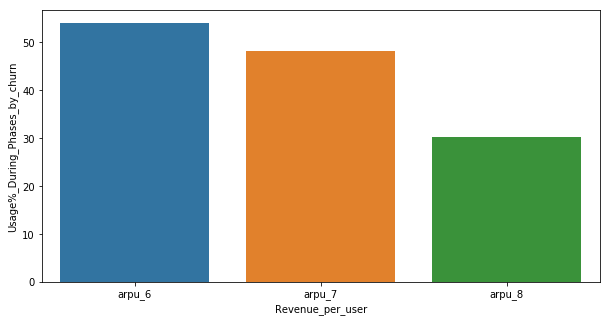

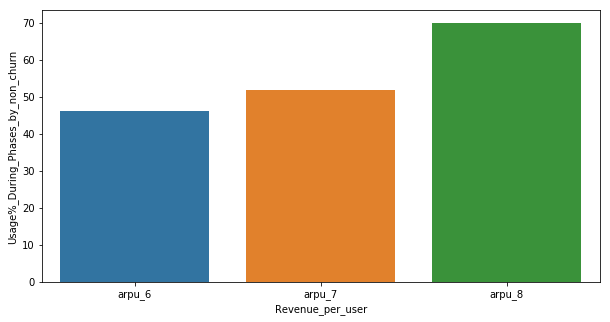

In [33]:
X1 = churn_data.groupby('churn')['arpu_6'].agg(['mean']).reset_index()
X1.rename(columns={'mean': "arpu_6"}, inplace=True)

X2 =churn_data.groupby(['churn'])['arpu_7'].agg(['mean']).reset_index()
X2.rename(columns={'mean': "arpu_7"}, inplace=True)
X3 = churn_data.groupby(['churn'])['arpu_8'].agg(['mean']).reset_index()
X3.rename(columns={'mean': "arpu_8"}, inplace=True)

X1 = pd.merge(X1, X2, on = ['churn'])
X1 = pd.merge(X1,X3, on = ['churn'])
X1.head()

X1 = X1.transpose().reset_index()
X1 =X1.loc[1:,:]

X1.columns = ['Revenue_per_user', 'Not-Churn', 'Churn']
X1['Usage%_During_Phases_by_churn'] = round((X1['Churn']/(X1['Not-Churn'] + X1['Churn']))*100,2)
X1['Usage%_During_Phases_by_non_churn'] = round((X1['Not-Churn']/(X1['Not-Churn'] + X1['Churn']))*100,2)

print(X1.head())
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
p = sns.barplot(x='Revenue_per_user', y='Usage%_During_Phases_by_churn', data=X1)

print(X1.head())
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
p = sns.barplot(x='Revenue_per_user', y='Usage%_During_Phases_by_non_churn', data=X1)

##### Thus, we see that for customers which are likely to churn , their averge revenue keeps on decreasing from good phase to chrun phase.Whereas for customers which do not churn, on an avergae their ARPU keeps on increasing month after month.Thus, for csutomers which are not likely to churn , we see an increase in the consumption and vice versa

### 2. onnet mou trend

   churn  onnet_mou_6
0      0   286.442246
1      1   413.100262
   churn  onnet_mou_7
0      0   303.957491
1      1   323.373043
   churn  onnet_mou_8
0      0   282.301300
1      1   150.601454
   churn      month6      month7      month8
0      0  286.442246  303.957491  282.301300
1      1  413.100262  323.373043  150.601454
   Months  non-churn-onnet-usage  churn-onnet-usage
1  month6             286.442246         413.100262
2  month7             303.957491         323.373043
3  month8             282.301300         150.601454


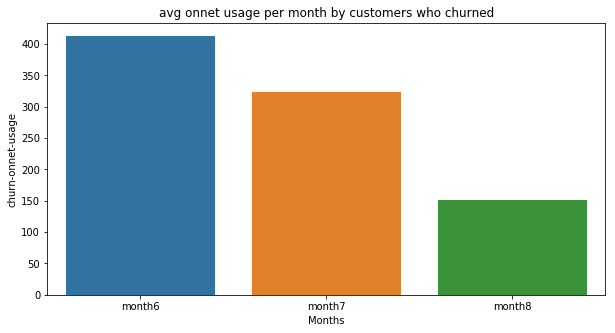

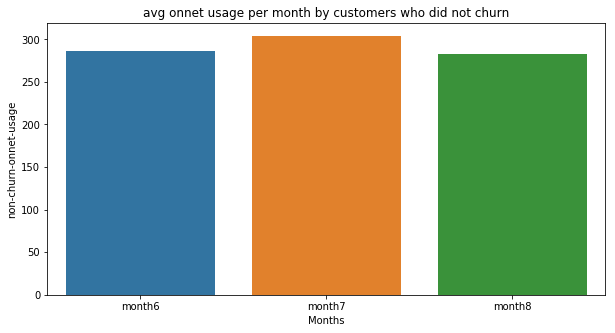

In [34]:
##onnet_mou -> Analyzing the trend for calls (avg.monthly usage for churn and non-churn customers)

month_6_onnet_mou = pd.DataFrame(churn_data.groupby('churn')['onnet_mou_6'].mean())
month_6_onnet_mou= month_6_onnet_mou.reset_index()

month_7_onnet_mou = pd.DataFrame(churn_data.groupby('churn')['onnet_mou_7'].mean())
month_7_onnet_mou= month_7_onnet_mou.reset_index()

month_8_onnet_mou = pd.DataFrame(churn_data.groupby('churn')['onnet_mou_8'].mean())
month_8_onnet_mou= month_8_onnet_mou.reset_index()


print(month_6_onnet_mou)
print(month_7_onnet_mou)
print(month_8_onnet_mou)

avg_onnet_mou_class  =  pd.concat([month_6_onnet_mou,month_7_onnet_mou.drop(columns=['churn'],axis=1),month_8_onnet_mou.drop(columns=['churn'],axis=1)],axis = 1)
avg_onnet_mou_class.columns = ['churn','month6','month7','month8']
print(avg_onnet_mou_class)

avg_onnet_mou_class = avg_onnet_mou_class.transpose().reset_index()
avg_onnet_mou_class = avg_onnet_mou_class.loc[1:,:]
avg_onnet_mou_class.columns = ['Months','non-churn-onnet-usage','churn-onnet-usage']
print(avg_onnet_mou_class)


#plotting graph for to analyze trend for avg onnet usage per month by customers who churned
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
plt.title('avg onnet usage per month by customers who churned')
p = sns.barplot(x='Months', y='churn-onnet-usage', data=avg_onnet_mou_class)


#plotting graph for to analyze trend for avg onnet usage per month by customers who churned
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
plt.title('avg onnet usage per month by customers who did not churn')
p = sns.barplot(x='Months', y='non-churn-onnet-usage', data=avg_onnet_mou_class)



##### Thus, we see that cutomers who churn their on network call usage decreases with months where as for customers who do not churn, the calls usage remains almost constant across months.thus, decrease in call usage is an important driver in identifying the churn

### 3. offnet mou trend

   churn  offnet_mou_6
0      0    411.266891
1      1    523.272719
   churn  offnet_mou_7
0      0    426.734116
1      1    427.574391
   churn  offnet_mou_8
0      0    398.205144
1      1    220.811034
   churn      month6      month7      month8
0      0  411.266891  426.734116  398.205144
1      1  523.272719  427.574391  220.811034
   Months  non-churn-offnet-usage  churn-offnet-usage
1  month6              411.266891          523.272719
2  month7              426.734116          427.574391
3  month8              398.205144          220.811034


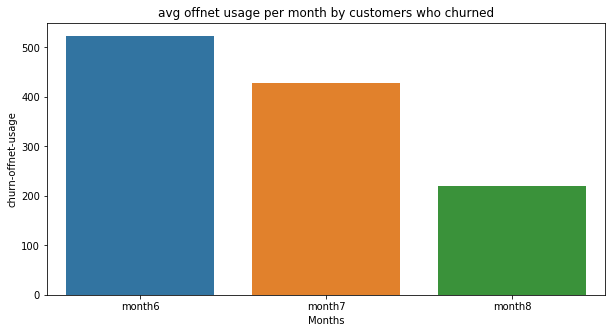

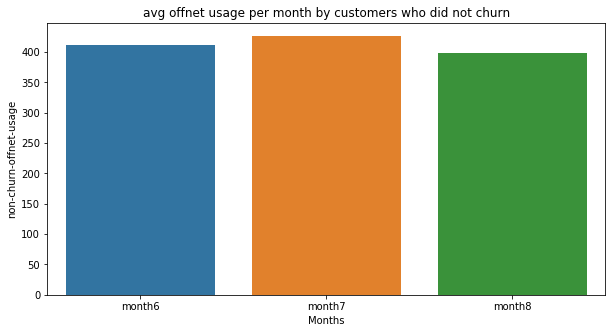

In [35]:
##offnet_mou -> Analyzing the trend for off net. calls (avg.monthly usage for churn and non-churn customers)

month_6_offnet_mou = pd.DataFrame(churn_data.groupby('churn')['offnet_mou_6'].mean())
month_6_offnet_mou= month_6_offnet_mou.reset_index()

month_7_offnet_mou = pd.DataFrame(churn_data.groupby('churn')['offnet_mou_7'].mean())
month_7_offnet_mou= month_7_offnet_mou.reset_index()

month_8_offnet_mou = pd.DataFrame(churn_data.groupby('churn')['offnet_mou_8'].mean())
month_8_offnet_mou= month_8_offnet_mou.reset_index()


print(month_6_offnet_mou)
print(month_7_offnet_mou)
print(month_8_offnet_mou)

avg_offnet_mou_class  =  pd.concat([month_6_offnet_mou,month_7_offnet_mou.drop(columns=['churn'],axis=1),month_8_offnet_mou.drop(columns=['churn'],axis=1)],axis = 1)
avg_offnet_mou_class.columns = ['churn','month6','month7','month8']
print(avg_offnet_mou_class)

avg_offnet_mou_class = avg_offnet_mou_class.transpose().reset_index()
avg_offnet_mou_class = avg_offnet_mou_class.loc[1:,:]
avg_offnet_mou_class.columns = ['Months','non-churn-offnet-usage','churn-offnet-usage']
print(avg_offnet_mou_class)


#plotting graph for to analyze trend for avg onnet usage per month by customers who churned
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
plt.title('avg offnet usage per month by customers who churned')
p = sns.barplot(x='Months', y='churn-offnet-usage', data=avg_offnet_mou_class)


#plotting graph for to analyze trend for avg onnet usage per month by customers who churned
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
plt.title('avg offnet usage per month by customers who did not churn')
p = sns.barplot(x='Months', y='non-churn-offnet-usage', data=avg_offnet_mou_class)

Thus, we see that cutomers who churn their off network call usage decreases with months where as for customers who do not churn, the calls usage remains almost constant across months.
thus, decrease in call usage is an important driver in identifying the churn

### 4. Outgoing MOU data analysis

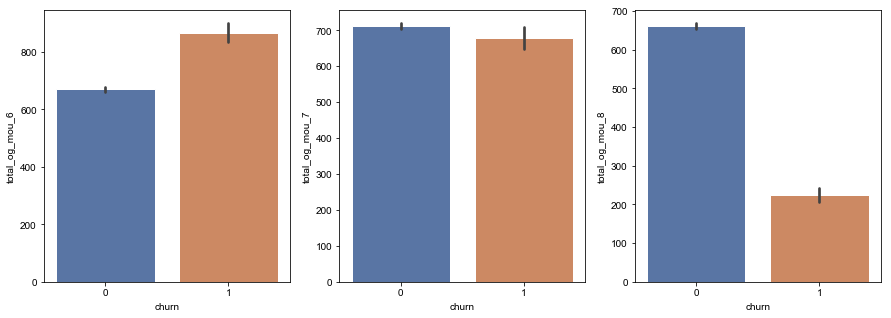

In [36]:
#Checking outgoing calls data pattern in 3 months 
#loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
#std_og_mou_6,std_og_mou_7,std_og_mou_8
#isd_og_mou_6,isd_og_mou_7,isd_og_mou_8
#spl_og_mou_6,spl_og_mou_7,spl_og_mou_8

#Total outgoing mou is given by total_og_mou_6,total_og_mou_7,total_og_mou_8

#total_og_mou_6 = loc_og_mou_6 + std_og_mou_6 + isd_og_mou_6 + spl_og_mou_6
#total_og_mou_7 = loc_og_mou_7 + std_og_mou_7 + isd_og_mou_7 + spl_og_mou_7
#total_og_mou_8 = loc_og_mou_8 + std_og_mou_8 + isd_og_mou_8 + spl_og_mou_8


fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.set(style="whitegrid")

sns.barplot(x='churn',y='total_og_mou_6',data=churn_data,ax=ax[0])
sns.barplot(x='churn',y='total_og_mou_7',data=churn_data,ax=ax[1])
sns.barplot(x='churn',y='total_og_mou_8',data=churn_data,ax=ax[2])

plt.show()

##### Total outgoing mou significantly dropped in the month of August for churn customers

### 5. T2C MOU - Calls to call centre

In [37]:
#Kpi's for T2C - 
#loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8 
#std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8

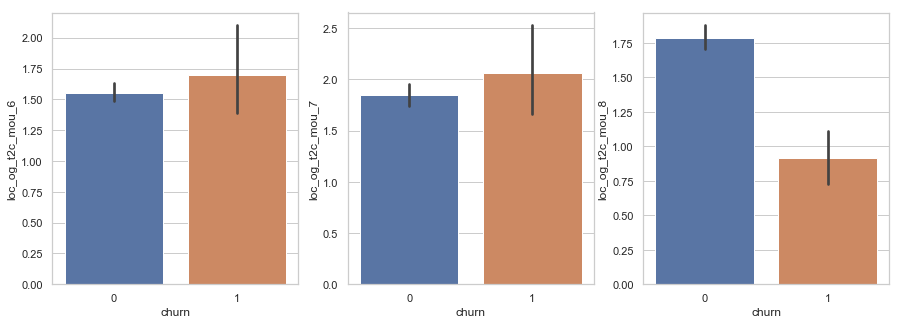

In [38]:
#local calls to call centre
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.set(style="whitegrid")

sns.barplot(x='churn',y='loc_og_t2c_mou_6',data=churn_data,ax=ax[0])
sns.barplot(x='churn',y='loc_og_t2c_mou_7',data=churn_data,ax=ax[1])
sns.barplot(x='churn',y='loc_og_t2c_mou_8',data=churn_data,ax=ax[2])

plt.show()

##### T2C mou reduced in the month of August for churn customers, It might indicates that the customers were not happy with the service or resolutions given by the call centres as the mou for T2C is high in June and July but dropped in August

### 6. Incoming calls data analysis

In [39]:
#Checking incoming calls data pattern in 3 months 
#loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
#std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
#isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
#spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8

#Total outgoing mou is given by total_og_mou_6,total_og_mou_7,total_og_mou_8

#total_ic_mou_6 = loc_ic_mou_6 + std_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6
#total_ic_mou_7 = loc_ic_mou_7 + std_ic_mou_7 + isd_ic_mou_7 + spl_ic_mou_7
#total_ic_mou_8 = loc_ic_mou_8 + std_ic_mou_8 + isd_ic_mou_8 + spl_ic_mou_8

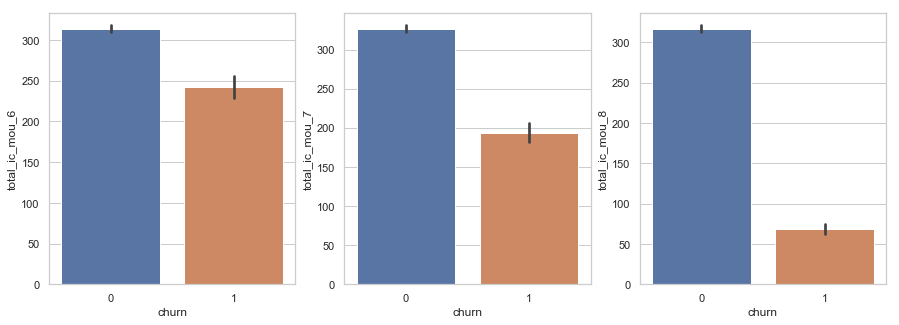

In [40]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.set(style="whitegrid")

sns.barplot(x='churn',y='total_ic_mou_6',data=churn_data,ax=ax[0])
sns.barplot(x='churn',y='total_ic_mou_7',data=churn_data,ax=ax[1])
sns.barplot(x='churn',y='total_ic_mou_8',data=churn_data,ax=ax[2])

plt.show()

#### Incoming mou reduced consitently from June-August for churn customers

### 7. Data usage trend

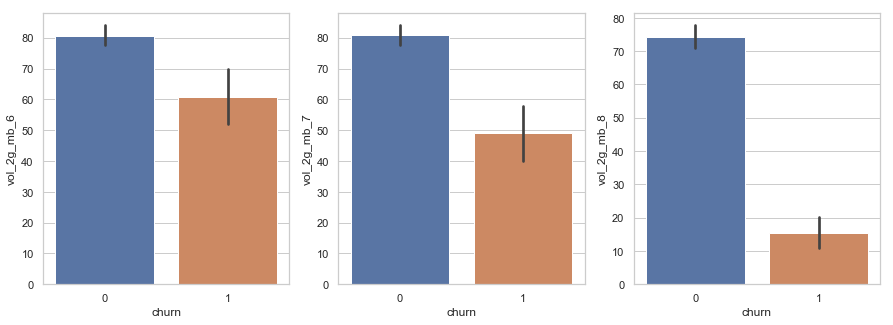

In [41]:
#2G Data consumption
#Kpi's - vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.set(style="whitegrid")

sns.barplot(x='churn',y='vol_2g_mb_6',data=churn_data,ax=ax[0])
sns.barplot(x='churn',y='vol_2g_mb_7',data=churn_data,ax=ax[1])
sns.barplot(x='churn',y='vol_2g_mb_8',data=churn_data,ax=ax[2])

plt.show()

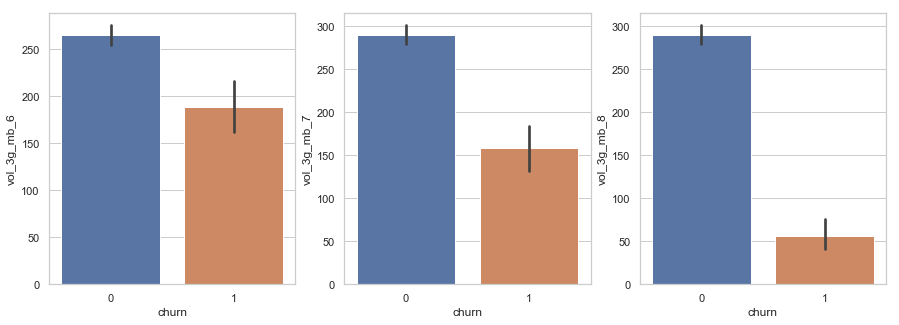

In [42]:
#3G Data consumption
#Kpi's - vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.set(style="whitegrid")

sns.barplot(x='churn',y='vol_3g_mb_6',data=churn_data,ax=ax[0])
sns.barplot(x='churn',y='vol_3g_mb_7',data=churn_data,ax=ax[1])
sns.barplot(x='churn',y='vol_3g_mb_8',data=churn_data,ax=ax[2])

plt.show()

##### Thus, we see that cutomers who churn their 3g and 2g data consumption decreases with months where as for customers who do not churn, the 3g/2g usage remains almost constant across months.thus, decrease in 3g/2g data consumption is an important driver in identifying the churn

### 8. AON (Age On Network)



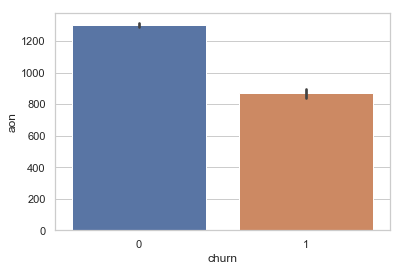

In [43]:
sns.barplot(x='churn',y='aon',data=churn_data)
plt.show()

#### We can infer customers who are likely to churn have spend less time on the network as compared to non-churn customers

### 9. Roaming data analysis

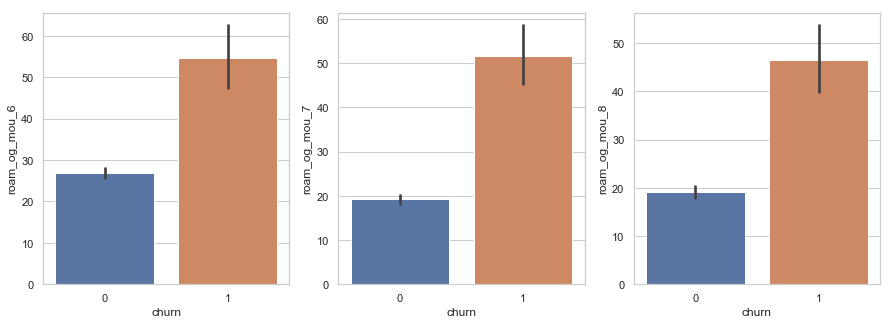

In [44]:
#Outgoing roaming calls
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.set(style="whitegrid")

sns.barplot(x='churn',y='roam_og_mou_6',data=churn_data,ax=ax[0])
sns.barplot(x='churn',y='roam_og_mou_7',data=churn_data,ax=ax[1])
sns.barplot(x='churn',y='roam_og_mou_8',data=churn_data,ax=ax[2])

plt.show()

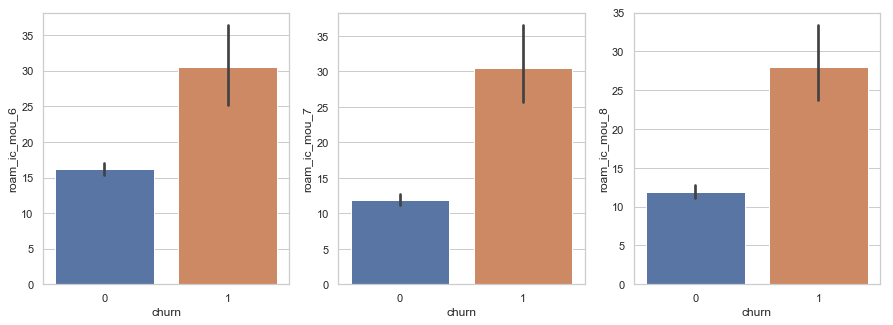

In [45]:
#incoming roaming calls
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.set(style="whitegrid")

sns.barplot(x='churn',y='roam_ic_mou_6',data=churn_data,ax=ax[0])
sns.barplot(x='churn',y='roam_ic_mou_7',data=churn_data,ax=ax[1])
sns.barplot(x='churn',y='roam_ic_mou_8',data=churn_data,ax=ax[2])

plt.show()

##### we don't see much difference in the roaming outgoing and incoming usage between the two classes.

### 10.Analyzing sachet 3g services

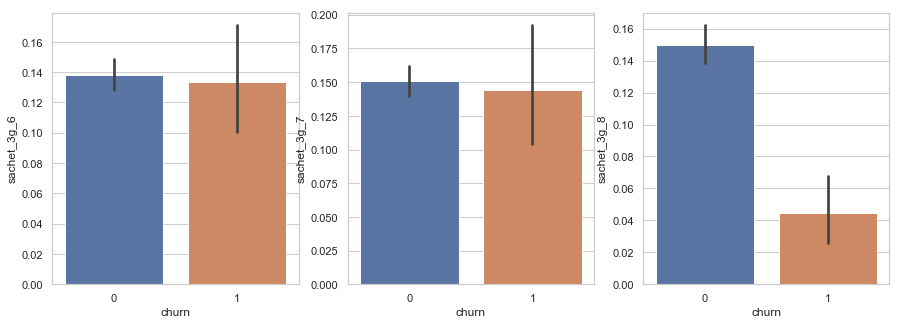

In [46]:


fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

sns.barplot(data = churn_data,x='churn',y='sachet_3g_6',ax=ax[0])
sns.barplot(data = churn_data,x='churn',y='sachet_3g_7',ax=ax[1])
sns.barplot(data = churn_data,x='churn',y='sachet_3g_8',ax=ax[2])

### Derived Variables

###### From EDA we see that difference between attributes of month 8 and month 6 + month 7 combined is huge, Hence, the difference between the attributes of month8 and month 6 and month 7 combined can be an important driver variables in the model. Hence, deriving these variables

In [47]:
churn_data['arpu_diff'] = churn_data.arpu_8 - ((churn_data.arpu_6 + churn_data.arpu_7)/2)

churn_data['onnet_mou_diff'] = churn_data.onnet_mou_8 - ((churn_data.onnet_mou_6 + churn_data.onnet_mou_7)/2)

churn_data['offnet_mou_diff'] = churn_data.offnet_mou_8 - ((churn_data.offnet_mou_6 + churn_data.offnet_mou_7)/2)

churn_data['roam_ic_mou_diff'] = churn_data.roam_ic_mou_8 - ((churn_data.roam_ic_mou_6 + churn_data.roam_ic_mou_7)/2)

churn_data['roam_og_mou_diff'] = churn_data.roam_og_mou_8 - ((churn_data.roam_og_mou_6 + churn_data.roam_og_mou_7)/2)

churn_data['loc_og_mou_diff'] = churn_data.loc_og_mou_8 - ((churn_data.loc_og_mou_6 + churn_data.loc_og_mou_7)/2)

churn_data['std_og_mou_diff'] = churn_data.std_og_mou_8 - ((churn_data.std_og_mou_6 + churn_data.std_og_mou_7)/2)

churn_data['isd_og_mou_diff'] = churn_data.isd_og_mou_8 - ((churn_data.isd_og_mou_6 + churn_data.isd_og_mou_7)/2)

churn_data['spl_og_mou_diff'] = churn_data.spl_og_mou_8 - ((churn_data.spl_og_mou_6 + churn_data.spl_og_mou_7)/2)

churn_data['total_og_mou_diff'] = churn_data.total_og_mou_8 - ((churn_data.total_og_mou_6 + churn_data.total_og_mou_7)/2)

churn_data['loc_ic_mou_diff'] = churn_data.loc_ic_mou_8 - ((churn_data.loc_ic_mou_6 + churn_data.loc_ic_mou_7)/2)

churn_data['std_ic_mou_diff'] = churn_data.std_ic_mou_8 - ((churn_data.std_ic_mou_6 + churn_data.std_ic_mou_7)/2)

churn_data['isd_ic_mou_diff'] = churn_data.isd_ic_mou_8 - ((churn_data.isd_ic_mou_6 + churn_data.isd_ic_mou_7)/2)

churn_data['spl_ic_mou_diff'] = churn_data.spl_ic_mou_8 - ((churn_data.spl_ic_mou_6 + churn_data.spl_ic_mou_7)/2)

churn_data['total_ic_mou_diff'] = churn_data.total_ic_mou_8 - ((churn_data.total_ic_mou_6 + churn_data.total_ic_mou_7)/2)

churn_data['total_rech_num_diff'] = churn_data.total_rech_num_8 - ((churn_data.total_rech_num_6 + churn_data.total_rech_num_7)/2)

churn_data['total_rech_amt_diff'] = churn_data.total_rech_amt_8 - ((churn_data.total_rech_amt_6 + churn_data.total_rech_amt_7)/2)

churn_data['vol_2g_mb_diff'] = churn_data.vol_2g_mb_8 - ((churn_data.vol_2g_mb_6 + churn_data.vol_2g_mb_7)/2)

churn_data['vol_3g_mb_diff'] = churn_data.vol_3g_mb_8 - ((churn_data.vol_3g_mb_6 + churn_data.vol_3g_mb_7)/2)

In [48]:
##Shape of df
churn_data.shape

(30011, 154)

In [49]:
#Dropping feature 'MobileNumber','circle_id'
churn_data.drop(['mobile_number','circle_id'],axis=1,inplace=True)

In [50]:
churn_data.shape   

(30011, 152)

## Modelling

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

In [52]:
#Dropping date features before modelling intuitively
churn_data.drop(columns=date_cols,axis=1,inplace=True)


In [53]:
# train- test split. Using Stratify as the class is highly imbalanced
df_train, df_test = train_test_split(churn_data,train_size = 0.70,random_state=100,stratify = churn_data['churn'])

In [54]:
print(len(df_train.loc[df_train['churn']==1].index)/df_train.shape[0]*100)
print(df_train.shape)
print(len(df_test.loc[df_test['churn']==1].index)/df_test.shape[0]*100)
print(df_test.shape)
# both the test data and train data have around 8.6% as churn 

8.639977150473651
(21007, 146)
8.640604175921812
(9004, 146)


In [55]:
#Split data to train and test datasets
y_train = df_train.pop('churn')
X_train = df_train

print(X_train.shape)
print(y_train.shape)

y_test = df_test.pop('churn')
X_test = df_test
print(y_test.shape)
print(X_test.shape)

(21007, 145)
(21007,)
(9004,)
(9004, 145)


### Applying PCA for Dimensionality Reduction with Logistic Regression

In [56]:
#PCA
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [57]:
print(pca.components_)

[[ 1.02978331e-01  1.33978329e-01  1.41141843e-01 ...  2.43250737e-02
   4.51545127e-03  1.54776857e-02]
 [ 1.08714995e-01  1.32672080e-01  1.50904079e-01 ...  3.44700958e-02
  -1.32399175e-03  1.20186255e-02]
 [-6.52688482e-02  2.46494218e-02  1.72544983e-01 ...  2.26001402e-01
   8.51564134e-03  7.31790540e-02]
 ...
 [-0.00000000e+00 -4.08991643e-18 -2.73049920e-17 ...  9.30640340e-04
   8.63483026e-03  5.67528219e-04]
 [-0.00000000e+00  4.31040878e-18 -5.46123959e-19 ... -2.71965891e-05
   1.36690331e-04  3.30112120e-05]
 [ 3.16227013e-01  3.16227013e-01 -6.32454025e-01 ...  1.52715364e-05
  -4.58531411e-05  6.05691537e-04]]


In [58]:
#explained_variance_rati0
(np.cumsum(pca.explained_variance_ratio_))

array([0.22043525, 0.38226234, 0.48422594, 0.57547517, 0.63716852,
       0.69058993, 0.73321064, 0.7734672 , 0.80172433, 0.82826392,
       0.84516887, 0.86173251, 0.87748746, 0.89133492, 0.90262724,
       0.91371581, 0.92423719, 0.93112514, 0.93777732, 0.94428869,
       0.94984498, 0.95486122, 0.95898781, 0.96294774, 0.96660884,
       0.96957851, 0.97248593, 0.97501042, 0.9772945 , 0.97929771,
       0.98112526, 0.98287917, 0.98452502, 0.98606745, 0.98745632,
       0.9887907 , 0.98983366, 0.99074508, 0.99154513, 0.99226628,
       0.99292628, 0.99350853, 0.99407871, 0.99461706, 0.99510416,
       0.99557154, 0.99600407, 0.99641851, 0.99681352, 0.99719365,
       0.99754726, 0.99788879, 0.99821989, 0.99841603, 0.99857804,
       0.99872499, 0.99885972, 0.99898715, 0.99909922, 0.99920539,
       0.99930384, 0.99939778, 0.99947183, 0.99953882, 0.99960079,
       0.9996535 , 0.99969742, 0.99973658, 0.99977424, 0.99980472,
       0.99983165, 0.99985575, 0.99987699, 0.99989235, 0.99990

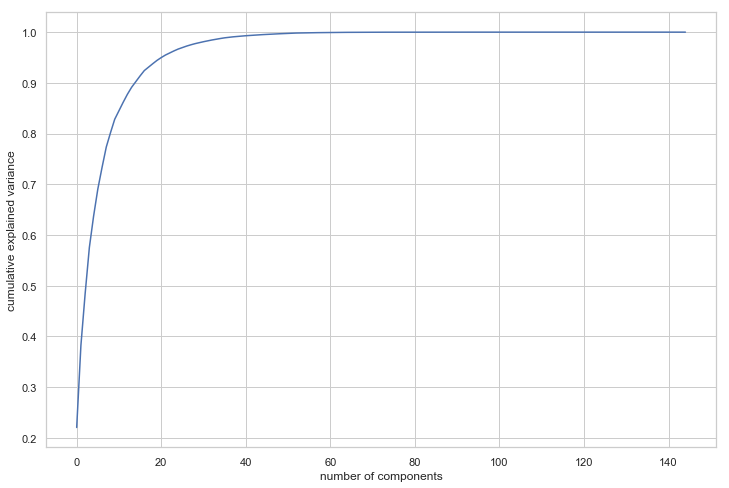

In [59]:
#plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [60]:
(np.cumsum(pca.explained_variance_ratio_))[25]

0.9695785124149203

In [61]:
# Taking 25 components as it explains 96% of missing values
# Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final = IncrementalPCA(n_components=25)
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=25, whiten=False)

In [62]:
#Transforming X_train and X_test
pca_train = pca_final.fit_transform(X_train)
pca_test = pca_final.transform(X_test)
print(pca_train.shape)
print(pca_test.shape)

(21007, 25)
(9004, 25)


In [63]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())

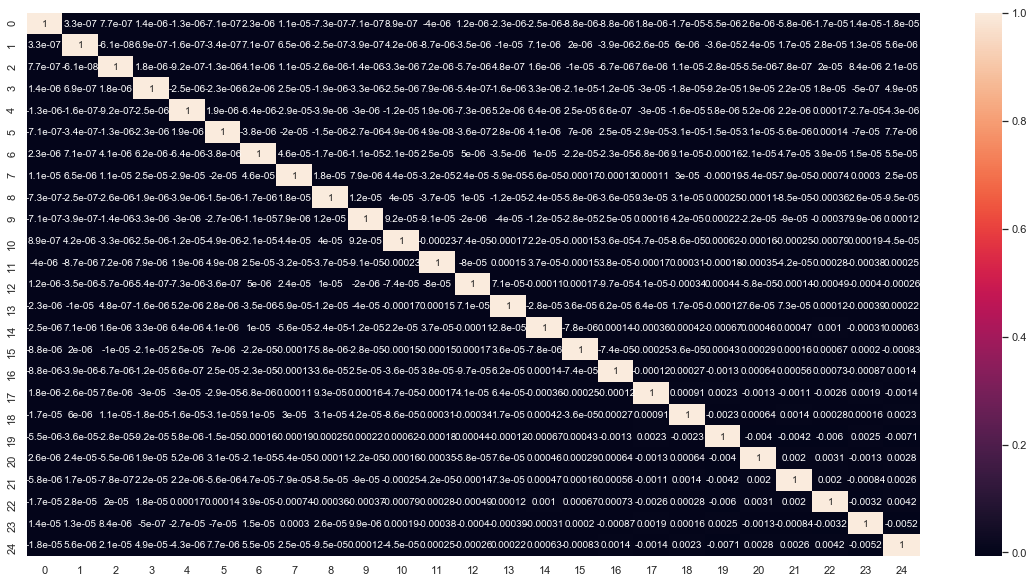

In [64]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

##### - We effectively have removed multicollinearity from our situation, and our models will be much more stable

### Logistic Regression

In [65]:
## logistic Regression
lr = LogisticRegression(class_weight='balanced')
lr.fit(pca_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [66]:
#testing on train data
y_train_pred_prob = lr.predict_proba(pca_train)
y_train_pred = lr.predict(pca_train)

In [67]:
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.roc_auc_score(y_train, y_train_pred_prob[:,1]))

#confusion matrix
confusion = confusion_matrix(y_train,y_train_pred)
confusion

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

senstivity = TP/(TP+FN)
print("Senstivity:" + str(senstivity))

0.7913552625315371
0.8762516406629484
Senstivity:0.8308539944903581


In [68]:
#Testing on test data
y_test_pred = lr.predict(pca_test)
y_test_pred_prob = lr.predict_proba(pca_test)

In [69]:
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.roc_auc_score(y_test, y_test_pred_prob[:,1]))

#confusion matrix
confusion = confusion_matrix(y_test,y_test_pred)
confusion

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

senstivity = TP/(TP+FN)
print("Senstivity:" + str(senstivity))

0.790759662372279
0.8650318414807397
Senstivity:0.8149100257069408


## Logistic Regression using Hyperparameter tuning

In [70]:
## hypertuned logistic regression
param = {'C':[0.0001,0.001,0.005,0.1,0.2,0.3,0.4,0.5,1,2], 'penalty':['l1','l2'], 'class_weight':['balanced',{0:0.4, 1:0.6}]}
logistic = LogisticRegression()

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

model = GridSearchCV(estimator=logistic, cv = folds, param_grid=param, scoring='recall',return_train_score=True)
model.fit(pca_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2], 'penalty': ['l1', 'l2'], 'class_weight': ['balanced', {0: 0.4, 1: 0.6}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [71]:
#Best parameters
model.best_params_

{'C': 0.0001, 'class_weight': 'balanced', 'penalty': 'l1'}

In [72]:
#Rebuild model on best parameters
logistic = LogisticRegression(penalty='l1',C=0.0001,class_weight='balanced')
lr.fit(pca_train,y_train)
y_test_pred_prob = lr.predict_proba(pca_test)
y_test_pred = lr.predict(pca_test)

In [73]:
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.roc_auc_score(y_test, y_test_pred_prob[:,1]))

#confusion matrix
confusion = confusion_matrix(y_test,y_test_pred)
confusion

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

senstivity = TP/(TP+FN)
print("Senstivity :" +str(round(senstivity,2)))

0.790759662372279
0.8650318414807397
Senstivity :0.81


#### This model is performing well and hence can be used for forecasting. But for predictions , explainability can't be achieved using pca_components.Will try using DT and/or Random Forest to obtain feature importance and hence enable explainability

## Decision Tree

In [74]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
#Making predictions on train data 
y_train_pred = dt.predict(X_train)
print(metrics.accuracy_score(y_train,y_train_pred))

#confusion matrix
confusion = confusion_matrix(y_train,y_train_pred)
print(confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

senstivity = TP/(TP+FN)
print("Senstivity: "+str(senstivity))

0.9434474222878089
[[18946   246]
 [  942   873]]
Senstivity: 0.4809917355371901


In [76]:

# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8226
           1       0.69      0.43      0.53       778

   micro avg       0.93      0.93      0.93      9004
   macro avg       0.82      0.71      0.75      9004
weighted avg       0.93      0.93      0.93      9004



In [77]:
#Accuracy and Sensitivity
print(accuracy_score(y_test,y_pred_default))
print(metrics.recall_score(y_test,y_pred_default))

0.9341403820524211
0.42802056555269924


## Decision Tree - Hypertuned

In [78]:
# Decision Tree after hypertuning the parameters
param_grid = {
    'max_depth': range(10, 16, 2),
    'min_samples_leaf': range(5, 15, 5),
    'min_samples_split': range(5, 15, 5),
    'criterion': ["entropy", "gini"]
     }

n_folds  = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
model = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,scoring='recall',return_train_score=True)

# Fit the grid search to the data
model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  7.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(10, 16, 2), 'min_samples_leaf': range(5, 15, 5), 'min_samples_split': range(5, 15, 5), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [79]:
model.best_score_

0.5366360235949161

In [80]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [81]:
#Testing on Test data 
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=12,min_samples_leaf=5,min_samples_split=5)
dtree.fit(X_train,y_train)
y_test_pred = dtree.predict(X_test)

In [82]:
print(metrics.accuracy_score(y_test,y_test_pred))

#confusion matrix
confusion = confusion_matrix(y_test,y_test_pred)
print(confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

senstivity = TP/(TP+FN)
print("Senstivity:" + str(senstivity))

0.9213682807641048
[[7918  308]
 [ 400  378]]
Senstivity:0.48586118251928023


In [83]:
#Selecting top 20 features
top_20_features=[]
x= dtree.feature_importances_
fe_importance = pd.DataFrame({'feature_name':X_train.columns,'importance' : x})
fe_importance.sort_values(by=['importance'],ascending=False,inplace=True)
top_20_features = fe_importance.iloc[0:21,0]
top_20_features

80          total_ic_mou_8
135      total_og_mou_diff
14           roam_og_mou_8
101     last_day_rch_amt_8
95        total_rech_amt_8
96          max_rech_amt_6
130       roam_og_mou_diff
65            loc_ic_mou_8
51          total_og_mou_6
29            loc_og_mou_8
59        loc_ic_t2m_mou_8
11           roam_ic_mou_8
13           roam_og_mou_7
126              arpu_diff
1                   arpu_7
142    total_rech_amt_diff
128        offnet_mou_diff
2                   arpu_8
137        std_ic_mou_diff
75            std_ic_mou_6
141    total_rech_num_diff
Name: feature_name, dtype: object

### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1, n_estimators=100)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features":['auto'], 'min_samples_leaf': range(5, 15, 5),'min_samples_split': range(5, 15, 5)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)
model.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto'], 'min_samples_leaf': range(5, 15, 5), 'min_samples_split': range(5, 15, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [85]:
model.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [86]:
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1, n_estimators=100,criterion='gini',
                               max_features='auto',min_samples_leaf=10,min_samples_split=10)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [87]:
y_test_pred = forest.predict(X_test)

print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.roc_auc_score(y_test, y_test_pred_prob[:,1]))

#confusion matrix
confusion = confusion_matrix(y_test,y_test_pred)
confusion

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

senstivity = TP/(TP+FN)
print("Senstivity:" + str(senstivity))

0.932252332296757
0.8650318414807397
Senstivity:0.6696658097686375


In [88]:
x_rf= dtree.feature_importances_
fe_importance_rf = pd.DataFrame({'feature_name':X_train.columns,'importance' : x_rf})
fe_importance_rf.sort_values(by=['importance'],ascending=False,inplace=True)
top_20_features_rf = fe_importance_rf.iloc[0:21,0]

In [89]:
top_20_features_rf

80          total_ic_mou_8
135      total_og_mou_diff
14           roam_og_mou_8
101     last_day_rch_amt_8
95        total_rech_amt_8
96          max_rech_amt_6
130       roam_og_mou_diff
65            loc_ic_mou_8
51          total_og_mou_6
29            loc_og_mou_8
59        loc_ic_t2m_mou_8
11           roam_ic_mou_8
13           roam_og_mou_7
126              arpu_diff
1                   arpu_7
142    total_rech_amt_diff
128        offnet_mou_diff
2                   arpu_8
137        std_ic_mou_diff
75            std_ic_mou_6
141    total_rech_num_diff
Name: feature_name, dtype: object

We get the same 20 features as top 20 features what we got from Decision tree. Thus,we create the final logistic regression model using these 20 features to enable interpretability

## Logistic Regression using Top 20 Features - Hypertuned

In [90]:
## hypertuned logistic regression using top 20 features 
param = {'C':[0.0001,0.001,0.005,0.1,0.2,0.3,0.4,0.5,1,2], 'penalty':['l1','l2'], 'class_weight':['balanced',{0:0.4, 1:0.6}]}
logistic = LogisticRegression()

n_folds  = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

model = GridSearchCV(estimator=logistic, cv = n_folds, param_grid=param, scoring='recall',return_train_score=True)
model.fit(X_train[top_20_features], y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2], 'penalty': ['l1', 'l2'], 'class_weight': ['balanced', {0: 0.4, 1: 0.6}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [91]:
model.best_params_

{'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l1'}

In [92]:
#building logistic regression using top 20 features and best params
logistic = LogisticRegression(penalty='l2',C=0.1,class_weight='balanced')
lr.fit(X_train[top_20_features],y_train)

y_train_pred_prob = lr.predict_proba(X_train[top_20_features])

In [93]:
# tuning the threshold coefficient

y_train_1 = y_train.reset_index(drop=True)
y_train_pred_prob_1 = pd.Series(y_train_pred_prob[:,1])
print(y_train_1.shape)
print(y_train_pred_prob_1.shape)

y_pred_final = pd.concat([y_train_1,y_train_pred_prob_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()


# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
threshold = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in threshold:
    y_pred_final[i] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)


cutoff_df = pd.DataFrame( columns = ['Threshold','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

(21007,)
(21007,)
     Threshold  accuracy     sensi     speci
0.0        0.0  0.086400  1.000000  0.000000
0.1        0.1  0.333889  0.969697  0.273760
0.2        0.2  0.495549  0.939945  0.453522
0.3        0.3  0.636931  0.906887  0.611401
0.4        0.4  0.749607  0.867769  0.738433
0.5        0.5  0.828057  0.823140  0.828522
0.6        0.6  0.880516  0.757025  0.892195
0.7        0.7  0.910125  0.653444  0.934400
0.8        0.8  0.923692  0.507989  0.963005
0.9        0.9  0.923216  0.264463  0.985515


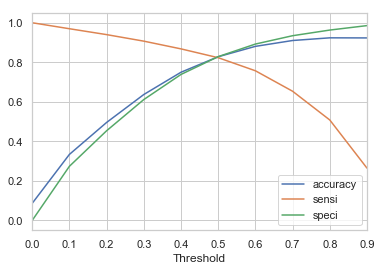

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Threshold', y=['accuracy','sensi','speci'])
plt.show()

Thus, we see that 0.5 is the threshold where everything seems balanced.
but since we are more concerned with senstivity , we can use 0.4 as the optimal threshold to increase senstivity without much affecting the specificity and accuracy

In [95]:
#testing on test data , using 0.4 threshold, and top 20 features
y_test_pred_prob = lr.predict_proba(X_test[top_20_features])
y_test_pred_prob_churn = y_test_pred_prob[:,1]
y_test_pred_prob_churn

y_test_pred = [1 if prob>0.4 else 0 for prob in y_test_pred_prob_churn]

In [96]:
y_test.reset_index(drop=True,inplace = True)
y_test_pred = pd.Series(y_test_pred)

In [97]:
#Senstivity on Test data for model with 20 top features, 0.4 threshold and hypertuned parameters
print(metrics.accuracy_score(y_test,y_test_pred))

#confusion matrix
confusion = confusion_matrix(y_test,y_test_pred)
print(confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

senstivity = TP/(TP+FN)
print("Senstivity:" + str(senstivity))

0.7472234562416704
[[6069 2157]
 [ 119  659]]
Senstivity:0.8470437017994858


In [98]:
#coefficients of lr 
coeff = lr.coef_
print(coeff)
interpretability = pd.DataFrame({'features':list(top_20_features),'coeff':coeff.reshape(-1)})
interpretability

[[-0.01001536 -0.00112516  0.00193108 -0.00400783 -0.00050181  0.0007231
  -0.00161515  0.00849172 -0.00025878 -0.00131204 -0.00190442  0.00169381
   0.00098534  0.00035109  0.0009443  -0.00048622  0.00035134 -0.00015173
   0.00300223  0.00511963 -0.0305043 ]]


,features,coeff
0,total_ic_mou_8,-0.010015
1,total_og_mou_diff,-0.001125
2,roam_og_mou_8,0.001931
3,last_day_rch_amt_8,-0.004008
4,total_rech_amt_8,-0.000502
5,max_rech_amt_6,0.000723
6,roam_og_mou_diff,-0.001615
7,loc_ic_mou_8,0.008492
8,total_og_mou_6,-0.000259
9,loc_og_mou_8,-0.001312


## Final Conclusion

Thus, we feel that in order to recognise the churn customers, the telecom compnay should keep a close watch on the following key things:
<ul> 
   <li>if the 3g consumption of a person starts decreasing during the course of time, he may be about to churn and thus special offers can be created for such users </li>
    <li>if the total recharge amount difference begins to decrease each month, the customer is most likley to churn</li>
    <li> Parameters with negative coefficients are the strong indicators of inferring the odds of churn , 
If the value associated with negative coefficients decreases , then Odds(Probaility of churn/probability of not churn) will increase. Hence increase in Odds ,means increase in probability of Churn .
Thus, we need to keep a close check on the parameters with negative coefficients.
    </li>
</ul>